In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

%matplotlib inline



In [4]:
data = pd.read_csv('dataset_for_analyst_assignment_20201120.csv')

In [5]:
# Making a copy of the data so that we keep the original data safe
wolt_data = data.copy()

In [10]:
#Return number of rows and columns
wolt_data.shape

(21983, 30)

In [11]:
#Return first 5 rows of the dataset
wolt_data.head()

,REGISTRATION_DATE,REGISTRATION_COUNTRY,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,FIRST_PURCHASE_DAY,LAST_PURCHASE_DAY,USER_ID,BREAKFAST_PURCHASES,LUNCH_PURCHASES,...,WEB_PURCHASES,ANDROID_PURCHASES,PREFERRED_RESTAURANT_TYPES,USER_HAS_VALID_PAYMENT_METHOD,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,PURCHASE_COUNT_BY_STORE_TYPE
0,2019-09-01 00:00:00.000,DNK,0,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
1,2019-09-01 00:00:00.000,FIN,1,1.0,0.0,2020-09-02 00:00:00.000,2020-09-02 00:00:00.000,2,0.0,1.0,...,0.0,1.0,NaN,False,23.0,2.0,NaN,NaN,6.853,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
2,2019-09-01 00:00:00.000,DNK,19,19.0,0.0,2019-12-10 00:00:00.000,2020-05-25 00:00:00.000,3,0.0,4.0,...,19.0,0.0,NaN,True,21.0,2.0,9.0,3.0,6.559,"{\n ""General merchandise"": 1,\n ""Grocery"": 9..."
3,2019-09-01 00:00:00.000,FIN,0,NaN,NaN,NaN,NaN,4,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."
4,2019-09-01 00:00:00.000,GRC,0,NaN,NaN,NaN,NaN,5,NaN,NaN,...,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,"{\n ""General merchandise"": 0,\n ""Grocery"": 0..."


In [12]:
#Return info on dataset
wolt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   REGISTRATION_DATE                        21983 non-null  object 
 1   REGISTRATION_COUNTRY                     21983 non-null  object 
 2   PURCHASE_COUNT                           21983 non-null  int64  
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64
 5   FIRST_PURCHASE_DAY                       11964 non-null  object 
 6   LAST_PURCHASE_DAY                        12027 non-null  object 
 7   USER_ID                                  21983 non-null  int64  
 8   BREAKFAST_PURCHASES                      12028 non-null  float64
 9   LUNCH_PURCHASES                          12028 non-null  float64
 10  EVENING_PURCHASES                        12028

We notice that the dataframe date column is not a datetime type and the user_id is an integer so we will start first by changing the type of these columns so that it represents the data correctly

In [13]:
wolt_data['REGISTRATION_DATE'] = pd.to_datetime(wolt_data['REGISTRATION_DATE'])
wolt_data['USER_ID'] = wolt_data['USER_ID'].astype(str)

In [17]:
# Checking for null values and whether this would impact our analysis negatively or not  
wolt_data.isnull().sum()

REGISTRATION_DATE                              0
REGISTRATION_COUNTRY                           0
PURCHASE_COUNT                                 0
PURCHASE_COUNT_DELIVERY                     9955
PURCHASE_COUNT_TAKEAWAY                     9955
FIRST_PURCHASE_DAY                         10019
LAST_PURCHASE_DAY                           9956
USER_ID                                        0
BREAKFAST_PURCHASES                         9955
LUNCH_PURCHASES                             9955
EVENING_PURCHASES                           9955
DINNER_PURCHASES                            9955
LATE_NIGHT_PURCHASES                        9955
TOTAL_PURCHASES_EUR                         9955
DISTINCT_PURCHASE_VENUE_COUNT               9955
MIN_PURCHASE_VALUE_EUR                      9955
MAX_PURCHASE_VALUE_EUR                      9955
AVG_PURCHASE_VALUE_EUR                      9955
PREFERRED_DEVICE                              73
IOS_PURCHASES                               9955
WEB_PURCHASES       

In [18]:
# wolt_data.count() does not include NaN values
wolt_data2 = wolt_data[[column for column in wolt_data if wolt_data[column].count() / len(df) >= 0.3]]
print("List of dropped columns:", end=" ")
for c in wolt_data.columns:
    if c not in wolt_data2.columns:
        print(c, end=", ")
print('\n')
wolt_data=wolt_data2

List of dropped columns: 



In [19]:
# Checking the value counts of the REGISTRATION COUNTRY to get a quick image of which country has the most customers
wolt_data['REGISTRATION_COUNTRY'].value_counts()

FIN    10277
DNK     8081
GRC     3042
USA       70
GBR       54
SWE       45
EST       44
DEU       39
NOR       34
ITA       24
POL       23
LTU       22
ESP       19
CZE       14
HUN       11
AUS       11
BEL       11
FRA       11
NLD       10
ISR        9
RUS        8
IND        7
LVA        7
BRA        7
IRL        7
CYP        7
CAN        6
ARE        6
JPN        6
QAT        6
PRT        5
ROU        5
HRV        5
AUT        5
CHE        4
SGP        4
FRO        3
SVK        3
CHN        3
TUR        2
LBN        2
JOR        2
CHL        2
UKR        2
ISL        2
COL        2
AZE        2
KOR        1
PHL        1
SAU        1
PAK        1
TWN        1
GEO        1
MEX        1
HKG        1
GIN        1
KWT        1
MLT        1
SVN        1
Name: REGISTRATION_COUNTRY, dtype: int64

In [20]:
# PURCHASE COUNT_BY_STORE_TYPE has very valuable information to visualise
wolt_data['PURCHASE_COUNT_BY_STORE_TYPE'].head()

0    {\n  "General merchandise": 0,\n  "Grocery": 0...
1    {\n  "General merchandise": 0,\n  "Grocery": 0...
2    {\n  "General merchandise": 1,\n  "Grocery": 9...
3    {\n  "General merchandise": 0,\n  "Grocery": 0...
4    {\n  "General merchandise": 0,\n  "Grocery": 0...
Name: PURCHASE_COUNT_BY_STORE_TYPE, dtype: object

Breaking down the column PURCHASE_COUNT_BY_STORE TYPE into multiple columns to get better insights of the store type of the purchased products

In [21]:
# Setting up empty lists to store the values of the PURCHASE_COUNT_BY_STORE
General_merchandise = []
Grocery = []
Pet_supplies = []
Restaurant = []
Retail_store = []


# Looping over the PURCHASE_COUNT_BY_STORE_TYPE column to extract the information and store them in new columns
for row in wolt_data['PURCHASE_COUNT_BY_STORE_TYPE']:
    
    # The reason why I choose 2 digits when slicing, is because sum values have more than one digit
    General_merchandise.append(row[27:29]) # This will get the General merchandise values
    Grocery.append(row[43:45]) # This will get the Grocery values
    Pet_supplies.append(row[64:66]) # This will get the Pet supplies values
    Restaurant.append(row[83:85]) # This will get the Restaurant values
    Retail_store.append(row[104:106]) # This will get the Retail store values

In [22]:
# Creating new columns to store the values of each store
wolt_data['General_merchandise'] = General_merchandise
wolt_data['Grocery'] = Grocery
wolt_data['Pet_supplies'] = Pet_supplies
wolt_data['Restaurant'] = Restaurant
wolt_data['Retail_store'] = Retail_store

In [23]:
# Checking the new dataframe
wolt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   REGISTRATION_DATE                        21983 non-null  datetime64[ns]
 1   REGISTRATION_COUNTRY                     21983 non-null  object        
 2   PURCHASE_COUNT                           21983 non-null  int64         
 3   PURCHASE_COUNT_DELIVERY                  12028 non-null  float64       
 4   PURCHASE_COUNT_TAKEAWAY                  12028 non-null  float64       
 5   FIRST_PURCHASE_DAY                       11964 non-null  object        
 6   LAST_PURCHASE_DAY                        12027 non-null  object        
 7   USER_ID                                  21983 non-null  object        
 8   BREAKFAST_PURCHASES                      12028 non-null  float64       
 9   LUNCH_PURCHASES                        

In [24]:
# Cheking the 5 new columns
wolt_data.iloc[:, -5:].columns

Index(['General_merchandise', 'Grocery', 'Pet_supplies', 'Restaurant',
       'Retail_store'],
      dtype='object')

In [25]:
# the Pet_supplies, Restaurant, Retail_store have the value : between them and that needs to be replaced 
# That was caused while breaking down the PURCHASE_COUNT_BY_STORE_TYPE column into multiple columns 
# We can easily extract only the numeric values and remove the :
wolt_data['Pet_supplies'].value_counts()

0,    21599
 0      209
 1      173
:         2
Name: Pet_supplies, dtype: int64

In [26]:
# the Retail_store have the value e' and : between them and that need to be replaced 

wolt_data['Retail_store'].value_counts()

0\n    19742
3\n      474
:        383
 1       345
4\n      309
5\n      205
6\n      141
7\n      117
8\n       87
9\n       80
 2        60
 3        22
 4         8
 5         4
 6         2
e"         2
 8         1
 7         1
Name: Retail_store, dtype: int64

In [27]:
# Making a copy of the data
wolt_data_new = wolt_data.copy()

In [28]:
# Replacing the : value to 0
wolt_data_new['Pet_supplies'] = wolt_data_new['Pet_supplies'].replace(to_replace =": ",
                 value ="0")

# Replacing the : value to 0
wolt_data_new['Restaurant'] = wolt_data_new['Restaurant'].replace(to_replace =": ",
                 value ="0")

# Replacing the e" value to 0
wolt_data_new['Retail_store'] = wolt_data_new['Retail_store'].replace(to_replace ='e"',
                 value ="0")

# Replacing the : value to 0
wolt_data_new['Retail_store'] = wolt_data_new['Retail_store'].replace(to_replace =': ',
                 value ="0")

In [32]:
wolt_data_new['Pet_supplies'].value_counts()

0,    21599
 0      209
 1      173
0         2
Name: Pet_supplies, dtype: int64

In [33]:
# Extracting only the numeric values
wolt_data_new['General_merchandise'] = wolt_data_new['General_merchandise'].str.extract('(\d+)').astype(int)
wolt_data_new['Grocery'] = wolt_data_new['Grocery'].str.extract('(\d+)').astype(int)
wolt_data_new['Pet_supplies'] = wolt_data_new['Pet_supplies'].str.extract('(\d+)').astype(int)
wolt_data_new['Restaurant'] = wolt_data_new['Restaurant'].str.extract('(\d+)').astype(int)
wolt_data_new['Retail_store'] = wolt_data_new['Retail_store'].str.extract('(\d+)').astype(int)

In [34]:
#Checking the new outcome
wolt_data_new['Pet_supplies'].value_counts()

0    21810
1      173
Name: Pet_supplies, dtype: int64

In [35]:
wolt_data_new['Retail_store'].value_counts()

0    20127
3      496
1      345
4      317
5      209
6      143
7      118
8       88
9       80
2       60
Name: Retail_store, dtype: int64

In [36]:
# Converting the type of the new columns into integers 
wolt_data_new['General_merchandise'] = wolt_data_new['General_merchandise'].astype(int)
wolt_data_new['Grocery'] = wolt_data_new['Grocery'].astype(int)
wolt_data_new['Pet_supplies'] = wolt_data_new['Pet_supplies'].astype(int)
wolt_data_new['Restaurant'] = wolt_data_new['Restaurant'].astype(int)
wolt_data_new['Retail_store'] = wolt_data_new['Retail_store'].astype(int)

In [37]:
# Checking the type of the new columns
wolt_data_new.iloc[:, -5:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21983 entries, 0 to 21982
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   General_merchandise  21983 non-null  int32
 1   Grocery              21983 non-null  int32
 2   Pet_supplies         21983 non-null  int32
 3   Restaurant           21983 non-null  int32
 4   Retail_store         21983 non-null  int32
dtypes: int32(5)
memory usage: 429.5 KB


In [38]:
#to take a deeper look at the data and understand it
wolt_data_new.describe()


,PURCHASE_COUNT,PURCHASE_COUNT_DELIVERY,PURCHASE_COUNT_TAKEAWAY,BREAKFAST_PURCHASES,LUNCH_PURCHASES,EVENING_PURCHASES,DINNER_PURCHASES,LATE_NIGHT_PURCHASES,TOTAL_PURCHASES_EUR,DISTINCT_PURCHASE_VENUE_COUNT,...,MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE,MOST_COMMON_WEEKDAY_TO_PURCHASE,AVG_DAYS_BETWEEN_PURCHASES,MEDIAN_DAYS_BETWEEN_PURCHASES,AVERAGE_DELIVERY_DISTANCE_KMS,General_merchandise,Grocery,Pet_supplies,Restaurant,Retail_store
count,21983.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.000000,12028.0,12028.000000,12028.000000,...,12028.000000,12028.000000,7832.000000,7832.000000,12028.000000,21983.000000,21983.000000,21983.000000,21983.000000,21983.000000
mean,3.345358,5.741686,0.372464,0.193964,2.375042,0.493432,3.029016,0.0,176.210419,3.319671,...,11.501995,4.010392,64.293539,55.792135,5.961218,0.065596,0.569349,0.007870,1.746486,0.335441
std,8.523171,10.536220,1.416310,1.104067,5.626178,1.827710,5.238209,0.0,299.086986,3.766418,...,6.930837,2.010071,72.570103,74.963336,3.466263,0.247580,2.785153,0.088364,3.213905,1.278207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.012000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,32.384000,1.000000,...,5.000000,2.000000,18.000000,10.000000,2.950500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,75.900000,2.000000,...,11.500000,4.000000,39.500000,25.000000,5.928000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,6.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.0,196.328000,4.000000,...,18.000000,6.000000,81.000000,68.250000,8.978000,0.000000,0.000000,0.000000,3.000000,0.000000
max,320.000000,320.000000,44.000000,52.000000,171.000000,71.000000,104.000000,0.0,7979.620000,71.000000,...,23.000000,7.000000,421.000000,421.000000,11.999000,1.000000,82.000000,1.000000,88.000000,9.000000


In [39]:
# Filling the null values with the string Unknown
wolt_data_new["PREFERRED_DEVICE"].fillna('Unkown', inplace=True)

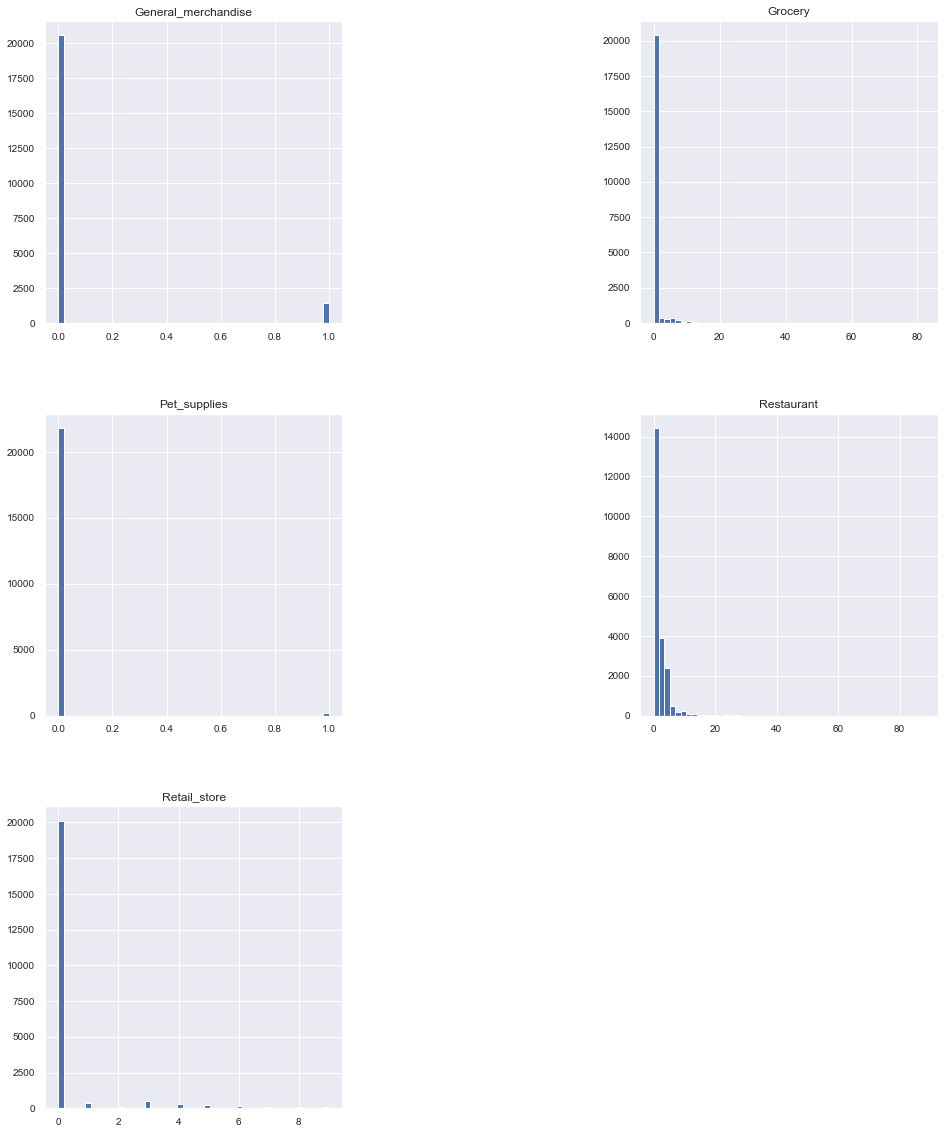

In [41]:
wolt_data_new.iloc[:, -5:].hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10); 
plt.subplots_adjust(wspace=1, hspace=0.3)
# ; avoid having the matplotlib verbose informations

Text(0.5, 1.0, 'Purchase count per device type for each registration data')

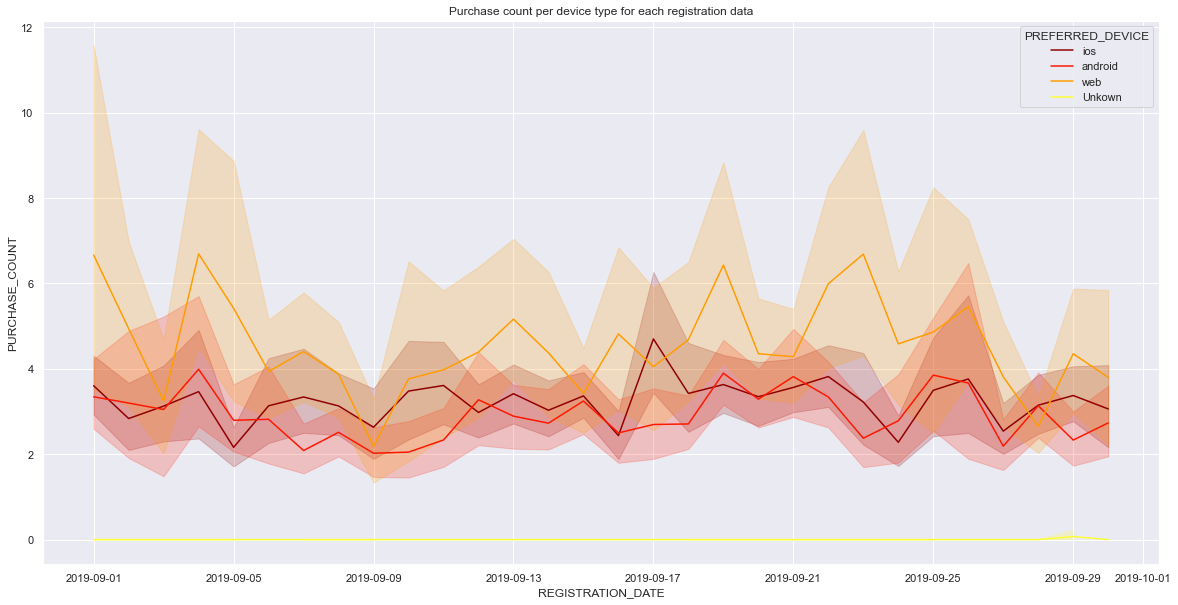

In [42]:
sns.set(rc = {'figure.figsize':(20,10)})

# Draw line plot of REGISTRATION_DATE and PURCHASE_COUNT with parameters
line_chart = sns.lineplot(data = wolt_data_new, x ='REGISTRATION_DATE', y='PURCHASE_COUNT', hue='PREFERRED_DEVICE',
            style = "PREFERRED_DEVICE", palette = "hot", dashes = False,  legend="brief")
line_chart.set_title("Purchase count per device type for each registration data")

# Looking at the line chart we notice that customers purchase the most using the web platform, followed by IOS and Android that are almost equally popular modes of purchase

In [43]:
sns.set(rc = {'figure.figsize':(20,10)})

# Creating a sub dataframe to segment the data based on the time of purchase
df_multible_columns = pd.DataFrame(data = wolt_data_new, columns = ['BREAKFAST_PURCHASES','LUNCH_PURCHASES',
                                                                'EVENING_PURCHASES','DINNER_PURCHASES',
                                                               'LATE_NIGHT_PURCHASES'])
# Melting the dataframe to become long instead of wide for better visualisation
df_multible_columns_long = pd.melt(df_multible_columns)

df_multible_columns_long.head()

# Grouping by the purchase time and summing the values
df_multible_columns_long = df_multible_columns_long.groupby('variable', as_index = False).sum()

Text(0.5, 1.0, 'Purchase count per meal time')

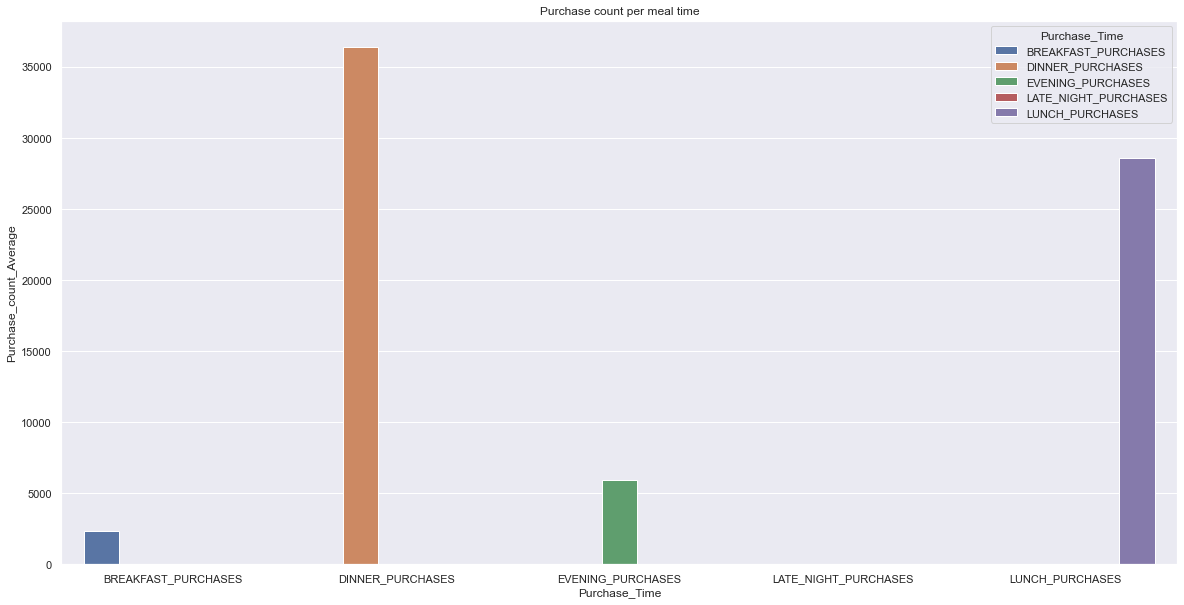

In [44]:
# Renaming the columns
df_multible_columns_long.rename({'variable': 'Purchase_Time', 'value': 'Purchase_count_Average'}, axis = 1, inplace=True)

# Creating a bar chart that shows the average of purchase count for each category
meal_time = sns.barplot(x="Purchase_Time", y="Purchase_count_Average", hue = 'Purchase_Time', data= df_multible_columns_long)

meal_time.set_title('Purchase count per meal time')

most users purchase at dinner and lunch time, which opens possibilities to provide products that would sell for breakfast and other times.

In [45]:
# Setting up the figure size
sns.set(rc = {'figure.figsize':(20,10)})

# Creating a sub dataframe to segment the data based on the type of purchase
df_purchase_type = pd.DataFrame(data = wolt_data_new, columns = ['General_merchandise', 'Grocery',
       'Pet_supplies', 'Restaurant', 'Retail_store'])

# Melting the dataframe to become long instead of wide for better visualisation
df_purchase_type_long = pd.melt(df_purchase_type)

df_purchase_type_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109915 entries, 0 to 109914
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   variable  109915 non-null  object
 1   value     109915 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.3+ MB


In [46]:
# Cheking if we have any missing values
df_purchase_type_long.isnull().sum()

variable    0
value       0
dtype: int64

In [47]:
# Checking the new dataframe
df_purchase_type_long

,variable,value
0,General_merchandise,0
1,General_merchandise,0
2,General_merchandise,1
3,General_merchandise,0
4,General_merchandise,0
...,...,...
109910,Retail_store,0
109911,Retail_store,0
109912,Retail_store,0
109913,Retail_store,0


In [48]:
# Renaming the columns
df_purchase_type_long.rename({'variable': 'Purchase_Type', 'value': 'Quantity_of_purchases'}, axis = 1, inplace=True)

In [49]:
# Grouping and summing the values to visualise the data
df_purchase_type_long = df_purchase_type_long.groupby(['Purchase_Type'], as_index = False).sum()

Text(0.5, 1.0, 'Purchase quantity per store type')

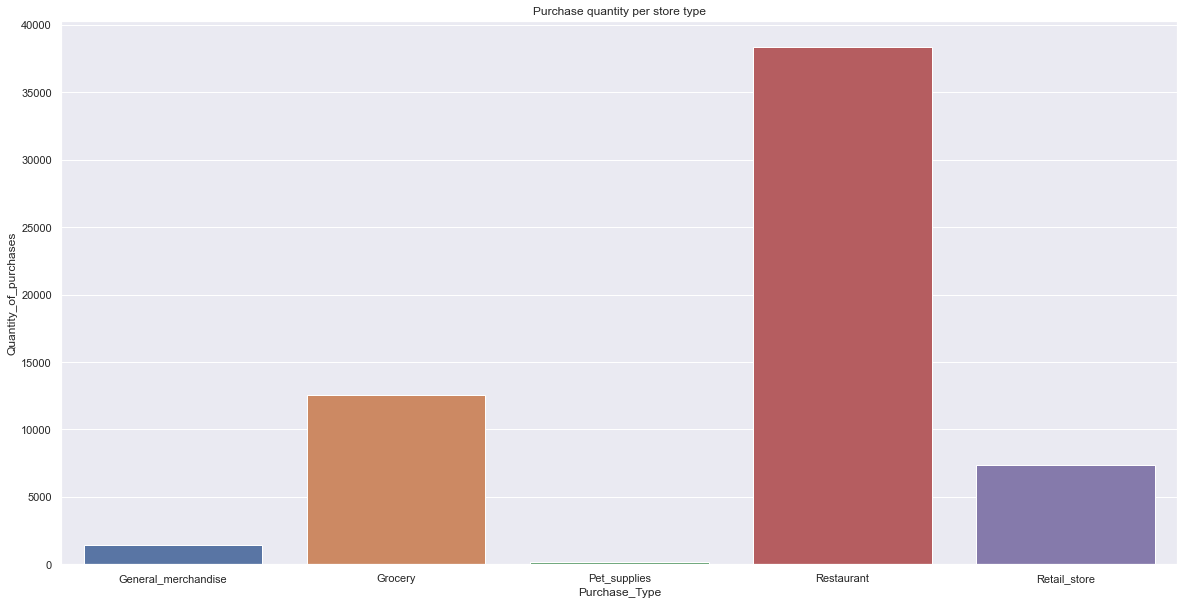

In [50]:
# Creating a bar chart that shows the sum of purchase store type for each category
store_type = sns.barplot(x="Purchase_Type", y = 'Quantity_of_purchases', data= df_purchase_type_long)

store_type.set_title('Purchase quantity per store type')

# We can see on the chart that most of the orders come from restaurants and groceries then come at second place. That could be caused by not having enough options for the other stores types.

In [51]:
top_20_users = wolt_data_new.sort_values('PURCHASE_COUNT', ascending=False).head(20)

Text(0.5, 1.0, 'Top 20 users per purchase count and country')

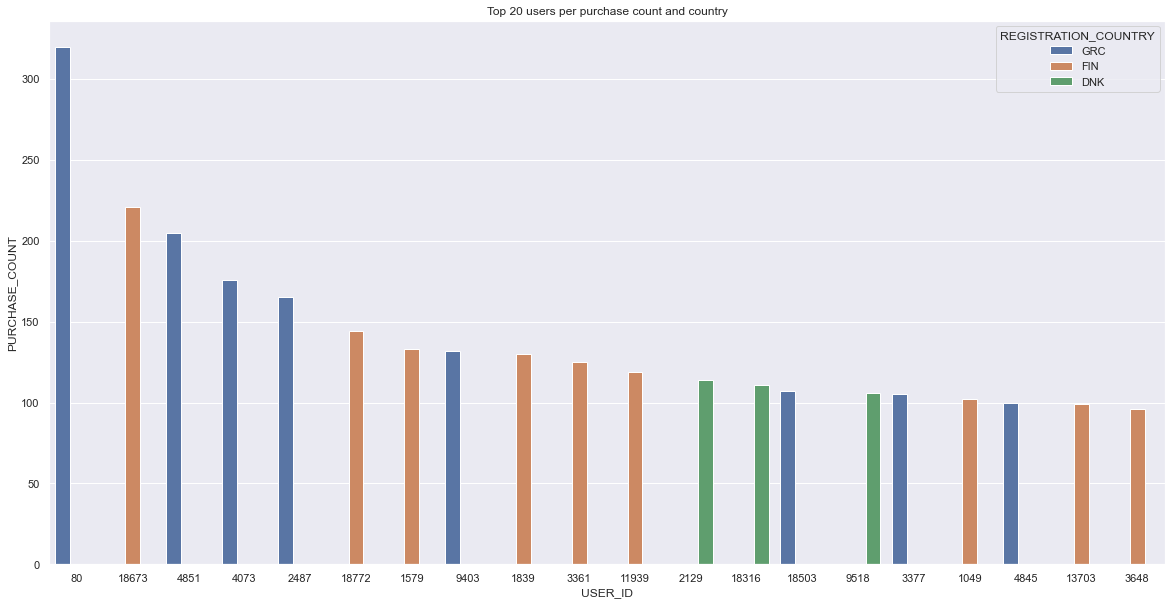

In [52]:
# Creating a bar chart that shows Top 20 users per purchase count and country
store_type = sns.barplot(x="USER_ID", y = 'PURCHASE_COUNT', data= top_20_users, hue = 'REGISTRATION_COUNTRY')

store_type.set_title('Top 20 users per purchase count and country')

In the chart above we can have a quick view of all users by country and see the most loyal customers

In [53]:
# Creating a segement of the dataframe that will show users with 0 purchases 
zero_purchase = wolt_data_new[wolt_data_new['PURCHASE_COUNT'] == 0]

# Grouping by PREFERRED_DEVICE and counting the values
PREFERRED_DEVICE = zero_purchase.groupby(['PREFERRED_DEVICE'], as_index = False)['REGISTRATION_DATE'].count()
PREFERRED_DEVICE

,PREFERRED_DEVICE,REGISTRATION_DATE
0,Unkown,72
1,android,4340
2,ios,4419
3,web,1124


In [54]:
# Calculating the percentage to see the ratio of customers with 0 purchases per device type

PREFERRED_DEVICE['percent'] = (PREFERRED_DEVICE['REGISTRATION_DATE'] / PREFERRED_DEVICE['REGISTRATION_DATE'].sum()) * 100
PREFERRED_DEVICE

,PREFERRED_DEVICE,REGISTRATION_DATE,percent
0,Unkown,72,0.723255
1,android,4340,43.596183
2,ios,4419,44.389754
3,web,1124,11.290809


Text(0.5, 1.0, 'The count of users who registered but never ordered anything')

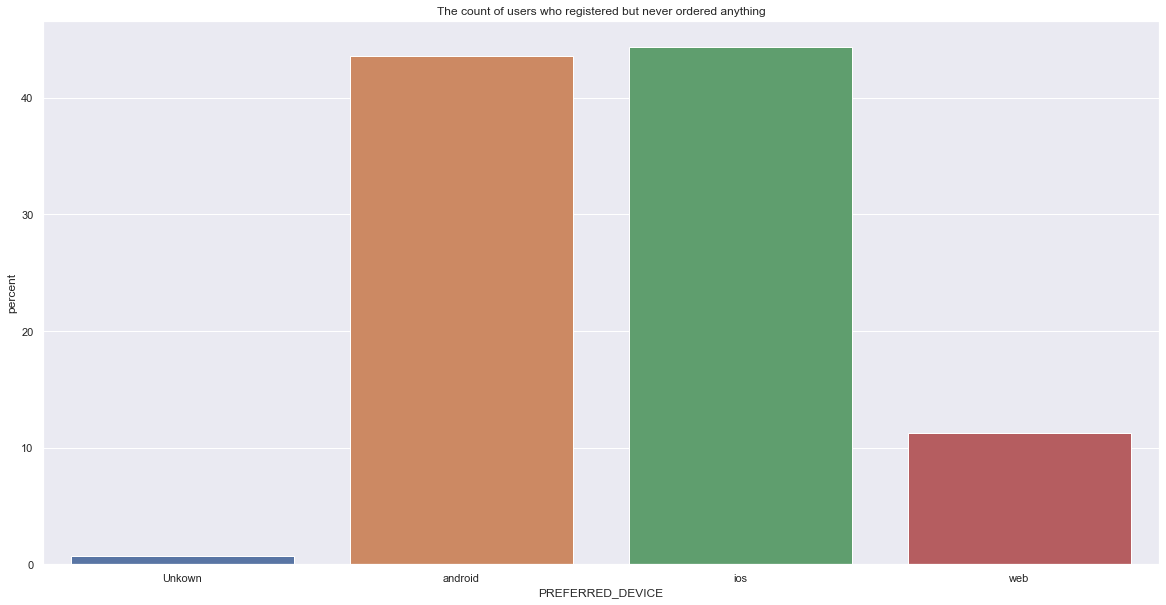

In [55]:
# Creating a bar chart that shows users who registered but never ordered anything
store_type = sns.barplot(x="PREFERRED_DEVICE", y = 'percent', data= PREFERRED_DEVICE)

store_type.set_title('The count of users who registered but never ordered anything')

Users with Android and IOS who didn't purchase anything when combined will have the 87% and for the web, we have 11%.
This is a great opportunity to dig deeper and understand what could be the reason behind this. 

In [56]:
# Renaming the values to weekday for easier read, starting from 1 Monday
wolt_data_new['MOST_COMMON_WEEKDAY_TO_PURCHASE'] = wolt_data_new['MOST_COMMON_WEEKDAY_TO_PURCHASE'].replace({1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                                                          4: 'Thursday', 5: 'Friday', 6: 'Saturday',
                                                         7: 'Sunday'})

In [57]:
# There are no significant differences in the purchase count per weekday
wolt_data_new.groupby(['MOST_COMMON_WEEKDAY_TO_PURCHASE'])['PURCHASE_COUNT'].sum()

MOST_COMMON_WEEKDAY_TO_PURCHASE
Friday        9694
Monday       10259
Saturday     10066
Sunday       10758
Thursday     11518
Tuesday      10737
Wednesday    10509
Name: PURCHASE_COUNT, dtype: int64

There are no significant differences in purchases per weekday but the lowest is Friday and highest is Thursday

In [58]:
# Creating true or false values based on whether there is a purchase at a certain store or not

wolt_data_new['General_merchandise_yes_or_no'] = wolt_data_new['General_merchandise'] > 0
wolt_data_new['Grocery_yes_or_no'] = wolt_data_new['Grocery'] > 0
wolt_data_new['Pet_supplies_yes_or_no'] = wolt_data_new['Pet_supplies'] > 0
wolt_data_new['Restaurant_yes_or_no'] = wolt_data_new['Restaurant'] > 0
wolt_data_new['Retail_store_yes_or_no'] = wolt_data_new['Retail_store'] > 0

In [59]:
# Changing the true and false values into 0 and 1 so that we can easily sum them
wolt_data_new['General_merchandise_yes_or_no'] = wolt_data_new['General_merchandise_yes_or_no'].astype(int)
wolt_data_new['Grocery_yes_or_no'] = wolt_data_new['Grocery_yes_or_no'].astype(int)
wolt_data_new['Pet_supplies_yes_or_no'] = wolt_data_new['Pet_supplies_yes_or_no'].astype(int)
wolt_data_new['Restaurant_yes_or_no'] = wolt_data_new['Restaurant_yes_or_no'].astype(int)
wolt_data_new['Retail_store_yes_or_no'] =wolt_data_new['Retail_store_yes_or_no'].astype(int)

In [60]:
# Creating a new column that will sum the number of purchase type per users
wolt_data_new['Number_of_purchase_types'] = (wolt_data_new['General_merchandise_yes_or_no'] 
                                             + wolt_data_new['Grocery_yes_or_no'] +
                                            wolt_data_new['Pet_supplies_yes_or_no'] +
                                            wolt_data_new['Restaurant_yes_or_no'] +
                                            wolt_data_new['Retail_store_yes_or_no'])

In [61]:
# Grouping Number_of_purchase_types to see the count of users who purchases from more than one store type
purchase_types_USER_ID = wolt_data_new.groupby(['Number_of_purchase_types'])['USER_ID'].count()

In [62]:
# Grouping Number_of_purchase_types to see the sum of PURCHASE_COUNT from more than one store type
purchase_types_PURCHASE_COUNT = wolt_data_new.groupby(['Number_of_purchase_types'])['PURCHASE_COUNT'].sum()

In [63]:
# Combining both dataframes together
combined_data = pd.concat([purchase_types_USER_ID, purchase_types_PURCHASE_COUNT], axis = 1)
# Renaming the columns
combined_data.rename({'USER_ID': 'USER_ID_Count'}, axis = 1, inplace=True)
# Resetting the index
combined_data = combined_data.reset_index()
# Changing the Number_of_purchase_types data type to string for better visualisation
combined_data['Number_of_purchase_types'] = combined_data['Number_of_purchase_types'].astype(str)
combined_data

,Number_of_purchase_types,USER_ID_Count,PURCHASE_COUNT
0,0,9955,0
1,1,8557,18206
2,2,1856,28730
3,3,1615,26605


It is clear that, amongst the users who do make a purchase, most users purchase from one store type only. However the users who buy from more than one store type place a lot more orders.

In [64]:
# Exploring the Number_of_purchase_types per country to see if we could focus on or target a certain country
REGISTRATION_COUNTRY = wolt_data_new.groupby(['Number_of_purchase_types', 'REGISTRATION_COUNTRY'],
                                             as_index = False)['USER_ID'].count()

# Renaming the columns
REGISTRATION_COUNTRY.rename({'USER_ID': 'USER_ID_Count'}, axis = 1, inplace=True)

# Changing the Number_of_purchase_types data type to string for better visualisation
REGISTRATION_COUNTRY['Number_of_purchase_types'] = REGISTRATION_COUNTRY['Number_of_purchase_types'].astype(str)

REGISTRATION_COUNTRY

,Number_of_purchase_types,REGISTRATION_COUNTRY,USER_ID_Count
0,0,ARE,5
1,0,AUS,11
2,0,AUT,5
3,0,AZE,2
4,0,BEL,11
...,...,...,...
89,3,GBR,1
90,3,GRC,187
91,3,ISR,1
92,3,LVA,1


In [65]:
top_20_users = REGISTRATION_COUNTRY.sort_values('USER_ID_Count', ascending=False).head(20)
top_20_users

,Number_of_purchase_types,REGISTRATION_COUNTRY,USER_ID_Count
17,0,FIN,4826
66,1,FIN,3794
64,1,DNK,3608
14,0,DNK,3096
23,0,GRC,1510
69,1,GRC,1112
79,2,FIN,887
88,3,FIN,770
77,2,DNK,727
86,3,DNK,650


Text(0.5, 1.0, 'Users that purchased from multiple stores per country and user counts')

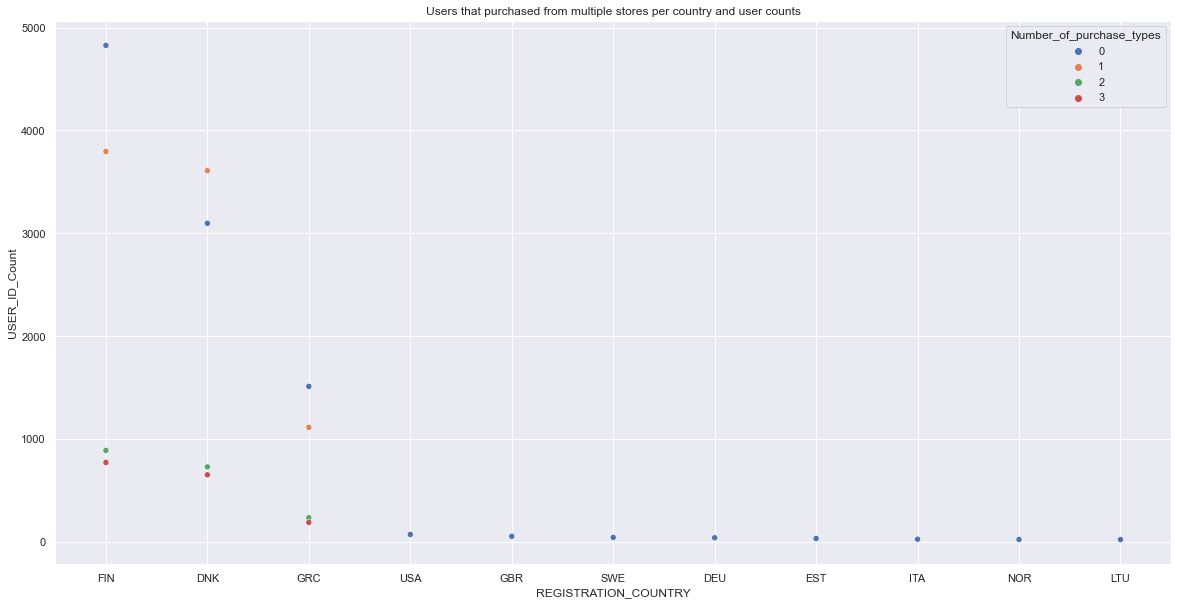

In [66]:
# Creating a bar chart that shows users who registered but never ordered anything
store_type = sns.scatterplot(x="REGISTRATION_COUNTRY", y = 'USER_ID_Count', hue ='Number_of_purchase_types',
                         data= top_20_users)

store_type.set_title('Users that purchased from multiple stores per country and user counts')

From the chart above we can see that most users who purchase from 1 store or more are in Finland and Denmark, perhaps most of the marketing and varieties offered only take place in Finland and Denmark. This is something that can be addressed for other countries, maybe use a similar strategy to that of Finland and Denmark.